In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#filtering warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
train  = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/train.csv',encoding='latin')
test   = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/test.csv')
sample = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sample_submission.csv')
train.head(5)

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a dÃ©posÃ© un faux rapport auprÃ¨..."
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requÃªte en faillite n Â° XX...
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel..."
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea..."
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crÃ©dit de soins pour...


In [5]:
train.shape, test.shape
print(train.iloc[1])
train

Complaint-ID                                                               Tr-2
Date-received                                                          7/7/2015
Transaction-Type                                               Credit reporting
Complaint-reason                         Incorrect information on credit report
Company-response               Company chooses not to provide a public response
Date-sent-to-company                                                   7/7/2015
Complaint-Status                                Closed with non-monetary relief
Consumer-disputes                                                            No
Consumer-complaint-summary    XX / XX / XXXX La requÃªte en faillite n Â° XX...
Name: 1, dtype: object


,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a dÃ©posÃ© un faux rapport auprÃ¨..."
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requÃªte en faillite n Â° XX...
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel..."
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea..."
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crÃ©dit de soins pour...
5,Tr-6,8/2/2016,Mortgage,"Loan modification,collection,foreclosure",NaN,8/3/2016,Closed with explanation,Yes,The owner of my original mortgage filed for ba...
6,Tr-7,3/26/2017,Credit reporting,Incorrect information on credit report,NaN,3/26/2017,Closed with explanation,No,J'ai Ã©tÃ© victime d'une fraude d'identitÃ© et...
7,Tr-8,10/15/2016,Bank account or service,Problems caused by my funds being low,Company has responded to the consumer and the ...,10/15/2016,Closed with explanation,No,"Je suis en train de faire faillite et, par con..."
8,Tr-9,1/18/2016,Debt collection,Cont'd attempts collect debt not owed,NaN,1/18/2016,Closed with explanation,Yes,Una agencia de cobranza me hizo adulterar de q...
9,Tr-10,8/17/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,8/17/2015,Closed with non-monetary relief,No,"Le XXXX / XXXX / 2015, j'ai reÃ§u une rÃ©ponse..."


In [26]:
L = sum(set([1,2,3,4,4,4,2,2]))
L

10

In [624]:
train['Complaint-Status'].value_counts()/train.shape[0]*100

Closed with explanation            79.277030
Closed with non-monetary relief    11.598022
Closed with monetary relief         6.513197
Closed                              1.869829
Untimely response                   0.741922
Name: Complaint-Status, dtype: float64

In [625]:
#checking dtypes
train.dtypes
#All categorical

Complaint-ID                  object
Date-received                 object
Transaction-Type              object
Complaint-reason              object
Company-response              object
Date-sent-to-company          object
Complaint-Status              object
Consumer-disputes             object
Consumer-complaint-summary    object
dtype: object

Complaint-ID number of unique elements 43266
Date-received number of unique elements 920
Transaction-Type number of unique elements 18
Complaint-reason number of unique elements 150
Company-response number of unique elements 10
Date-sent-to-company number of unique elements 930
Complaint-Status number of unique elements 5
Consumer-disputes number of unique elements 2
Consumer-complaint-summary number of unique elements 43022


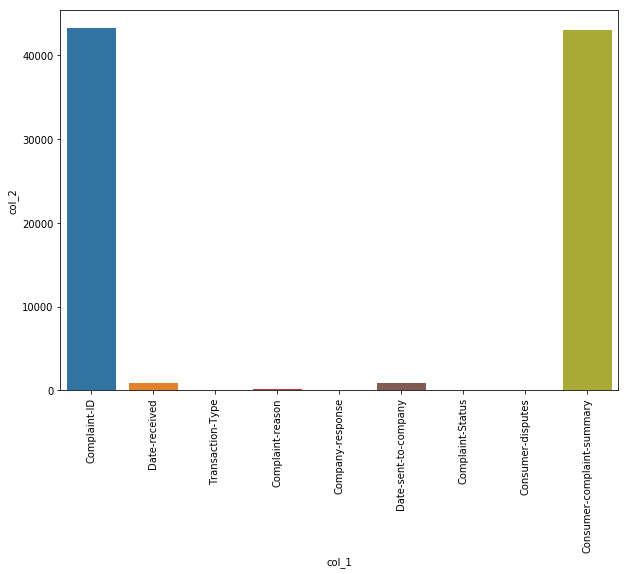

In [626]:
#checking number of unique elements
df = pd.DataFrame(columns=['col_1','col_2'])
for uni in train.columns:
    print('{} number of unique elements {}'. format(uni,train[uni].nunique()))
    curr_row = {
        'col_1': uni,
        'col_2': train[uni].nunique()
    }
    df = df.append(curr_row, ignore_index=True)


plt.figure(figsize=(10,7))    
sns.barplot(x = 'col_1',y = 'col_2', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

#complaint is unique as expected hence completely useless.


In [7]:
train.isnull().sum()/train.shape[0]*100

Complaint-ID                   0.000000
Date-received                  0.000000
Transaction-Type               0.000000
Complaint-reason               0.000000
Company-response              52.017751
Date-sent-to-company           0.000000
Complaint-Status               0.000000
Consumer-disputes             17.792262
Consumer-complaint-summary     0.000000
dtype: float64

### Since the target column is imbalanced by a good margin we will use the most frequent option and make an submission in order to get some feel of data

In [627]:
sub_1 = test.copy()
print(test.shape)
sub_1.head(5)

(18543, 8)


,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary
0,Te-1,8/18/2016,Bank account or service,"Account opening, closing, or management",Company has responded to the consumer and the ...,8/18/2016,No,XXXX / XXXX / 16 I called Citibank to open a c...
1,Te-2,4/18/2016,Debt collection,Communication tactics,Company believes it acted appropriately as aut...,4/20/2016,No,I'm struggling financially. I called and I off...
2,Te-3,3/23/2016,Credit reporting,Incorrect information on credit report,NaN,3/23/2016,No,"In XXXX of 2015, an automatic payment was conf..."
3,Te-4,6/26/2017,Student loan,Dealing with your lender or servicer,NaN,6/26/2017,NaN,"I submitted a request to XXXX, which is my cur..."
4,Te-5,5/13/2016,Credit reporting,Incorrect information on credit report,Company has responded to the consumer and the ...,5/13/2016,No,A state tax lien was filed against me XXXX / X...


In [628]:
sub_1['Complaint-Status'] = 'Closed with explanation'
print(sub_1.shape, test.shape)
sub_1.head(5)

(18543, 9) (18543, 8)


,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary,Complaint-Status
0,Te-1,8/18/2016,Bank account or service,"Account opening, closing, or management",Company has responded to the consumer and the ...,8/18/2016,No,XXXX / XXXX / 16 I called Citibank to open a c...,Closed with explanation
1,Te-2,4/18/2016,Debt collection,Communication tactics,Company believes it acted appropriately as aut...,4/20/2016,No,I'm struggling financially. I called and I off...,Closed with explanation
2,Te-3,3/23/2016,Credit reporting,Incorrect information on credit report,NaN,3/23/2016,No,"In XXXX of 2015, an automatic payment was conf...",Closed with explanation
3,Te-4,6/26/2017,Student loan,Dealing with your lender or servicer,NaN,6/26/2017,NaN,"I submitted a request to XXXX, which is my cur...",Closed with explanation
4,Te-5,5/13/2016,Credit reporting,Incorrect information on credit report,Company has responded to the consumer and the ...,5/13/2016,No,A state tax lien was filed against me XXXX / X...,Closed with explanation


In [68]:
sub_1 = sub_1[['Complaint-ID','Complaint-Status']]
sub_1.head(5)

,Complaint-ID,Complaint-Status
0,Te-1,Closed with explanation
1,Te-2,Closed with explanation
2,Te-3,Closed with explanation
3,Te-4,Closed with explanation
4,Te-5,Closed with explanation


In [80]:
sub_1 = sub_1.reset_index(drop = True)

sub_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_1.csv',index = False)
#.69 accuracy

In [630]:
#lets build a normal model dropping NA columns
train_wo_NA = train.drop(['Company-response','Consumer-disputes'], axis = 1)
test_wo_NA  = test.drop(['Company-response','Consumer-disputes'], axis = 1)

train_wo_NA.head(5)

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Date-sent-to-company,Complaint-Status,Consumer-complaint-summary
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",11/11/2015,Closed with explanation,"Seterus, Inc a dÃ©posÃ© un faux rapport auprÃ¨..."
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,7/7/2015,Closed with non-monetary relief,XX / XX / XXXX La requÃªte en faillite n Â° XX...
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,5/7/2015,Closed with explanation,"El XXXX / XXXX / 15, estaba preparando el vuel..."
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,11/12/2016,Closed with explanation,"The loan was paid in XXXX XXXX. In XXXX, 4 yea..."
4,Tr-5,9/29/2016,Credit card,Payoff process,9/29/2016,Closed with explanation,J'ai obtenu un compte de crÃ©dit de soins pour...


In [100]:
train_mod_1 = train_wo_NA.drop(['Complaint-ID','Date-received','Date-sent-to-company','Consumer-complaint-summary'], axis = 1)
test_x      = test_wo_NA.drop(['Complaint-ID','Date-received','Date-sent-to-company','Consumer-complaint-summary'], axis = 1)
train_mod_1.head(10)
train_y = train_mod_1['Complaint-Status']
train_x = train_mod_1.drop('Complaint-Status', axis = 1)
print(train_y.shape, train_x.shape, test_x.shape)

train_x_dummy = pd.get_dummies(train_x)
test_x_dummy  = pd.get_dummies(test_x)
print(train_x_dummy.shape,test_x_dummy.shape)

#We were getting different number of columns reson being complaint reason has less unique features in test. Hence We ll filter
#those  elements from train to avoid uneven number of columns


(43266,) (43266, 2) (18543, 2)
(43266, 168) (18543, 165)


In [207]:
print(train_x.nunique())
print(test_x.nunique())

x = train_x['Complaint-reason'].unique().tolist()
y = test_x['Complaint-reason'].unique().tolist()

print(len(x),len(y))

result_train = set(x) - set(y) # correct elements, but not yet in sorted order
print(sorted(result_train))
result_test  = set(y) - set(x)
print(sorted(result_test))

Transaction-Type     18
Complaint-reason    145
dtype: int64
Transaction-Type     18
Complaint-reason    147
dtype: int64
145 147
[]
["Can't stop withdrawals from your bank account", 'Problem with cash advance']


In [632]:
train_filtered          = train_wo_NA[((train_wo_NA['Complaint-reason'] != 'Advertising' ) & 
                                (train_wo_NA['Complaint-reason'] != 'Account terms and changes') &
                                (train_wo_NA['Complaint-reason'] != 'Incorrect exchange rate') &
                                (train_wo_NA['Complaint-reason'] != 'Problem with an overdraft') &
                                (train_wo_NA['Complaint-reason'] != "Was approved for a loan, but didn't receive the money") )]

print(train_filtered.nunique())

#test_filtered           = test_wo_NA[((test_wo_NA['Complaint-reason'] != 'Problem with cash advance' ) & 
#                                (test_wo_NA['Complaint-reason'] != "Can't stop withdrawals from your bank account") )]
                                
#print(test_filtered['Complaint-reason'].nunique())
print(train_filtered.shape,test.shape)

Complaint-ID                  43252
Date-received                   920
Transaction-Type                 18
Complaint-reason                145
Date-sent-to-company            930
Complaint-Status                  5
Consumer-complaint-summary    43008
dtype: int64
(43252, 7) (18543, 8)


In [213]:
train_mod_2 = train_filtered.drop(['Complaint-ID','Date-received','Date-sent-to-company','Consumer-complaint-summary'], axis = 1)
test_mod_2  =  test_wo_NA.drop(['Complaint-ID','Date-received','Date-sent-to-company','Consumer-complaint-summary'], axis = 1)
train_y = train_mod_2['Complaint-Status']
train_x = train_mod_2.drop('Complaint-Status', axis = 1)
print(train_y.shape, train_x.shape, test_mod_2.shape)
train_x_dummy = pd.get_dummies(train_x)

test_x_dummy  = pd.get_dummies(test_mod_2)
print(train_x_dummy.shape,test_x_dummy.shape)
train_x_dummy["Can't stop withdrawals from your bank account"] = 0
train_x_dummy['Problem with cash advance'] = 0
train_x_dummy.shape


(43252,) (43252, 2) (18543, 2)
(43252, 163) (18543, 165)


(43252, 165)

In [328]:
train_x.shape

(43252, 2)

In [633]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score

In [192]:
dt_mod_1 = DecisionTreeClassifier()
dt_mod_1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [219]:
dt_mod_1.fit(train_x_dummy,train_y)
mod_1_predict = dt_mod_1.predict(test_x_dummy)
df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_wo_NA['Complaint-ID'],
    'Complaint-Status' : mod_1_predict})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation        18529
Closed with monetary relief       14
Name: Complaint-Status, dtype: int64

In [231]:
dt_mod_1 = RandomForestClassifier(n_estimators=150)
dt_mod_1.fit(train_x_dummy,train_y)
mod_1_predict = dt_mod_1.predict(test_x_dummy)
df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_wo_NA['Complaint-ID'],
    'Complaint-Status' : mod_1_predict})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation        18529
Closed with monetary relief       14
Name: Complaint-Status, dtype: int64

In [223]:
df_sub_2.shape

(18543, 2)

In [222]:
dt_mod_1 = AdaBoostClassifier()
dt_mod_1.fit(train_x_dummy,train_y)
mod_1_predict = dt_mod_1.predict(test_x_dummy)
df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_wo_NA['Complaint-ID'],
    'Complaint-Status' : mod_1_predict})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation        18429
Closed with monetary relief      113
Untimely response                  1
Name: Complaint-Status, dtype: int64

In [224]:
df_sub_2.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_3.csv',index = False)
#69% accuracy

In [237]:
dt_mod_1 = RandomForestClassifier(n_estimators=150)
dt_mod_1.fit(train_x_dummy,train_y)
df       = pd.DataFrame(dt_mod_1.predict_proba(test_x_dummy),columns=['one','two','three','four','five'])*100
df.head(10)


,one,two,three,four,five
0,3.319404,65.483266,17.583231,13.614099,0.000000
1,2.393206,81.866948,2.151804,11.543091,2.044949
2,0.141973,75.866758,4.188460,19.401113,0.401697
3,0.440995,90.434275,5.151735,3.901440,0.071556
4,0.141973,75.866758,4.188460,19.401113,0.401697
5,3.319404,65.483266,17.583231,13.614099,0.000000
6,2.209894,84.578553,4.111530,7.300336,1.799687
7,0.141973,75.866758,4.188460,19.401113,0.401697
8,0.000000,92.058450,3.882701,3.963611,0.095238
9,0.000000,78.441961,13.894988,6.848788,0.814263


In [242]:
df_2 = df.sum(axis = 0).round()
print(df_2)
train['Complaint-Status'].value_counts()/train.shape[0]*100

one        20308.0
two      1465795.0
three     139902.0
four      210724.0
five       17570.0
dtype: float64


Closed with explanation            79.277030
Closed with non-monetary relief    11.598022
Closed with monetary relief         6.513197
Closed                              1.869829
Untimely response                   0.741922
Name: Complaint-Status, dtype: float64

In [634]:
#We have reached an impass for the time so we will try to work with consumer dispute column

#using KNN to fill values
train_filtered_knn         = train[((train['Complaint-reason'] != 'Advertising' ) & 
                                (train['Complaint-reason'] != 'Account terms and changes') &
                                (train['Complaint-reason'] != 'Incorrect exchange rate') &
                                (train['Complaint-reason'] != 'Problem with an overdraft') &
                                (train['Complaint-reason'] != "Was approved for a loan, but didn't receive the money") )]



In [259]:
#data_dummies_knn  = pd.get_dummies(train_filtered)

train_x_impute = train_filtered_knn[~pd.isnull(train_filtered_knn['Consumer-disputes'])].drop('Consumer-disputes', axis = 1)
test_x_impute = train_filtered_knn[pd.isnull(train_filtered_knn['Consumer-disputes'])].drop('Consumer-disputes', axis = 1)
print(train_x_impute.shape)
print(test_x_impute.shape)

train_x_knn      = train_x_impute.drop(['Complaint-ID','Date-received','Date-sent-to-company','Consumer-complaint-summary'], axis = 1)
test_x_knn       = test_x_impute.drop(['Complaint-ID','Date-received','Date-sent-to-company','Consumer-complaint-summary'], axis = 1)
train_knn_dummy  = pd.get_dummies(train_x_knn)
test_knn_dummy   = pd.get_dummies(test_x_knn)
print(train_knn_dummy.shape, test_knn_dummy.shape)

#making train_y
train_y_knn      = train_filtered_knn.loc[train_x_impute.index,'Consumer-disputes']


#from sklearn.preprocessing import StandardScaler
#scaler_impute = StandardScaler()
#scaler_impute.fit(train_knn_dummy)
#train_x_impute_scaled = scaler_impute.transform(train_knn_dummy)
#test_x_impute_scaled = scaler_impute.transform(test_knn_dummy)

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_knn_dummy, train_y_knn)
model_knn = model_knn.predict(test_knn_dummy)
model_knn

(35560, 8)
(7692, 8)
(35560, 113) (7692, 88)


ValueError: query data dimension must match training data dimension

In [266]:
print(train_x_knn.nunique())
print(test_x_knn.nunique())
print(train_filtered.nunique())

Transaction-Type    12
Complaint-reason    86
Company-response    10
Complaint-Status     5
dtype: int64
Transaction-Type     9
Complaint-reason    67
Company-response     8
Complaint-Status     4
dtype: int64
Complaint-ID                  43252
Date-received                   920
Transaction-Type                 18
Complaint-reason                145
Date-sent-to-company            930
Complaint-Status                  5
Consumer-complaint-summary    43008
dtype: int64


### did not work because uneven unique elements getting split into train and test. There are not enough features to predict anything right now

In [275]:
a = train_x_knn['Transaction-Type'].unique()
b = test_x_knn['Transaction-Type'].unique()

diff = set(a)-set(b)
print(len(diff))
diff_2 = set(b)-set(a)
print(len(diff_2))

test_x_knn['Transaction-Type'].unique()

9
6


array(['Credit card or prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Mortgage', 'Debt collection', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Student loan',
       'Money transfer, virtual currency, or money service',
       'Checking or savings account'], dtype=object)

In [278]:
encode_1     = train_filtered_knn['Complaint-reason']
from sklearn import preprocessing
le           = preprocessing.LabelEncoder()
le_encode_1  = le.fit(encode_1)
le_encode_1  = le.transform(encode_1) 
le_encode_1

array([ 75,  68, 141, ...,  73, 131,  12], dtype=int64)

### I tried to encode complaint-reason which had 149 different values. It turned pointless. please scroll down

In [291]:
train_filtered_knn['complaint_reason'] = le_encode_1
train_filtered_knn

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,complaint_reason,Days_taken
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a dÃ©posÃ© un faux rapport auprÃ¨...",75,0 days
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requÃªte en faillite n Â° XX...,68,0 days
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel...",141,0 days
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea...",34,0 days
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crÃ©dit de soins pour...,97,0 days
5,Tr-6,8/2/2016,Mortgage,"Loan modification,collection,foreclosure",NaN,8/3/2016,Closed with explanation,Yes,The owner of my original mortgage filed for ba...,73,-1 days
6,Tr-7,3/26/2017,Credit reporting,Incorrect information on credit report,NaN,3/26/2017,Closed with explanation,No,J'ai Ã©tÃ© victime d'une fraude d'identitÃ© et...,68,0 days
7,Tr-8,10/15/2016,Bank account or service,Problems caused by my funds being low,Company has responded to the consumer and the ...,10/15/2016,Closed with explanation,No,"Je suis en train de faire faillite et, par con...",113,0 days
8,Tr-9,1/18/2016,Debt collection,Cont'd attempts collect debt not owed,NaN,1/18/2016,Closed with explanation,Yes,Una agencia de cobranza me hizo adulterar de q...,34,0 days
9,Tr-10,8/17/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,8/17/2015,Closed with non-monetary relief,No,"Le XXXX / XXXX / 2015, j'ai reÃ§u une rÃ©ponse...",68,0 days


In [635]:
sent      = pd.to_datetime(train_filtered_knn['Date-sent-to-company'])
received  = pd.to_datetime(train_filtered_knn['Date-received'])

train_filtered_knn['Days_taken'] = (sent - received).dt.days
train_filtered_knn['Days_taken'].max()

x = train_filtered_knn[train_filtered_knn['Days_taken'] == 539]
x

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,Days_taken
27031,Tr-27032,5/4/2015,Debt collection,Cont'd attempts collect debt not owed,NaN,10/24/2016,Closed with explanation,No,I have a car loan with XXXX XXXX. I reposed my...,539


In [636]:
encode_target     = train_filtered_knn['Complaint-Status']
from sklearn import preprocessing
le                = preprocessing.LabelEncoder()
le_encode_target  = le.fit(encode_target)
le_encode_target  = le.transform(encode_target) 
le_encode_target
train_filtered_knn['Numeric_target'] = le_encode_target

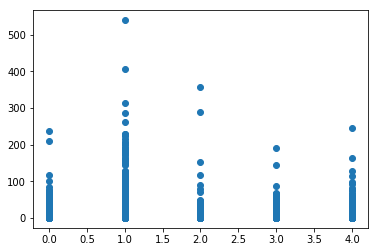

In [637]:
plt.scatter(train_filtered_knn['Numeric_target'],train_filtered_knn['Days_taken'])
plt.show()
#does not show much relation

### We are grouping on Complaint reason and taking its count. later we will divide it in 10 parts

In [638]:
x = pd.DataFrame(train_filtered_knn.groupby(['Complaint-reason']).size().reset_index().sort_values(0, ascending = False)).rename(columns = {0 : 'Frequency'})
x

Df_with_reason = pd.merge(train_filtered_knn, x, on = 'Complaint-reason', how='left')
Df_with_reason.head(5)

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,Days_taken,Numeric_target,Frequency
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a dÃ©posÃ© un faux rapport auprÃ¨...",0,1,3216
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requÃªte en faillite n Â° XX...,0,3,4466
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel...",0,1,346
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea...",0,1,3755
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crÃ©dit de soins pour...,0,1,103


In [639]:
print(Df_with_reason['Frequency'].value_counts())
#print(Df_with_reason['Complaint-reason'].value_counts())

4466    4466
3755    3755
3216    3216
2385    2385
1683    1683
1625    1625
1587    1587
1487    1487
1423    1423
1249    1249
1027    1027
1009    1009
840      840
835      835
752      752
698      698
694      694
689      689
639      639
638      638
632      632
517      517
502      502
491      491
437      437
419      419
368      368
346      346
335      335
324      324
        ... 
54        54
52        52
26        52
51        51
25        50
49        49
46        46
22        44
7         42
40        40
36        36
17        34
32        32
16        32
30        30
29        29
28        28
14        28
24        24
5         20
10        20
8         16
15        15
3         15
12        12
4         12
6         12
9          9
2          4
1          2
Name: Frequency, Length: 108, dtype: int64


In [641]:
Df_with_reason['Complaint-reason'].value_counts()

Incorrect information on credit report                                              4466
Cont'd attempts collect debt not owed                                               3755
Loan servicing, payments, escrow account                                            3216
Loan modification,collection,foreclosure                                            2385
Dealing with my lender or servicer                                                  1683
Disclosure verification of debt                                                     1625
Incorrect information on your report                                                1587
Communication tactics                                                               1487
Account opening, closing, or management                                             1423
Credit reporting company's investigation                                            1249
Managing the loan or lease                                                          1027
False statements or r

In [642]:
print(Df_with_reason['Complaint-reason'].nunique())
Df_with_reason['Frequency'].nunique()

145


108

In [643]:
model_2_df = Df_with_reason.drop(['Complaint-ID', 'Date-received','Complaint-reason','Company-response','Date-sent-to-company',
                                 'Consumer-complaint-summary', 'complaint_reason','Numeric_target','Consumer-disputes'], axis = 1)
model_2_df

x_train = model_2_df.drop('Complaint-Status', axis = 1)
y_train = model_2_df['Complaint-Status']
print(x_train.shape,y_train.shape)

x_train_dummy =pd.get_dummies(x_train)
x_train_dummy.shape


KeyError: "labels ['complaint_reason'] not contained in axis"

In [644]:
Df_with_test   = pd.merge(test, x, on = 'Complaint-reason', how='left', sort = False)

received_test  = pd.to_datetime(Df_with_test['Date-received'])
sent_test      = pd.to_datetime(Df_with_test['Date-sent-to-company'])

Df_with_test['Days_taken'] = (sent_test - received_test).dt.days
Df_with_test['Days_taken']


Df_with_test_2 = Df_with_test.drop(['Complaint-ID', 'Date-received','Complaint-reason','Company-response','Date-sent-to-company',
                                 'Consumer-complaint-summary','Consumer-disputes'], axis = 1)
Df_with_test_2.shape

Df_with_test_2.isnull().sum()

Df_with_test_2['Frequency'] = Df_with_test_2['Frequency'].fillna(0)
Df_with_test_2.isnull().sum()

x_test_dummy = pd.get_dummies(Df_with_test_2)
x_test_dummy.shape



(18543, 20)

In [645]:
Df_with_test_2[0] =  pd.to_numeric(Df_with_test_2[0]) 
Df_with_test_2.dtypes

KeyError: 0

In [646]:
dt_mod_1 = RandomForestClassifier(n_estimators=400,criterion='entropy')
dt_mod_1.fit(x_train_dummy,y_train)
mod_1_predict = dt_mod_1.predict(x_test_dummy)
df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test['Complaint-ID'],
    'Complaint-Status' : mod_1_predict})
df_sub_2['Complaint-Status'].value_counts()

NameError: name 'x_train_dummy' is not defined

In [443]:
df_sub_2['Complaint-Status'] = np.where(df_sub_2['Complaint-Status'] == 'Closed','Closed with explanation',df_sub_2['Complaint-Status'] )
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation            13815
Closed with non-monetary relief     4668
Closed with monetary relief           53
Untimely response                      7
Name: Complaint-Status, dtype: int64

In [444]:
#df_sub_2['Complaint-Status'].value_counts()/df_sub_2.shape[0]*100
df_sub_2.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub8.csv',index = False)
#61% result
#61 for closed into closed with monetary


In [412]:
#df_sub_2.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_4.csv',index = False)
df_sub_2.sort_values(['Complaint-ID','Complaint-Status'],ascending=True)
df_sub_2.head(5)

,Complaint-ID,Complaint-Status
0,Te-1,Closed with explanation
1,Te-2,Closed with explanation
2,Te-3,Closed with non-monetary relief
3,Te-4,Closed
4,Te-5,Closed with non-monetary relief


In [434]:
dt_mod_1 = DecisionTreeClassifier(criterion='entropy')
dt_mod_1.fit(x_train_dummy,y_train)
mod_1_predict = dt_mod_1.predict(x_test_dummy)
df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : Df_with_test['Complaint-ID'],
    'Complaint-Status' : mod_1_predict})
df_sub_2['Complaint-Status'].value_counts()


Closed with explanation            12312
Closed with non-monetary relief     3318
Untimely response                   1539
Closed                              1179
Closed with monetary relief          195
Name: Complaint-Status, dtype: int64

In [445]:
df_sub_2.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_6.csv',index = False)
#waste

PermissionError: [Errno 13] Permission denied: 'C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_6.csv'

In [653]:
Df_with_reason['Deciles'] = pd.qcut(Df_with_reason['Frequency'],8,labels=np.linspace(1,8,8))
Df_with_reason['Deciles'].value_counts()
Df_with_reason.head(5)

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,Days_taken,Numeric_target,Frequency,Deciles
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a dÃ©posÃ© un faux rapport auprÃ¨...",0,1,3216,6.0
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requÃªte en faillite n Â° XX...,0,3,4466,8.0
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel...",0,1,346,2.0
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea...",0,1,3755,7.0
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crÃ©dit de soins pour...,0,1,103,1.0


In [97]:
print(Df_with_reason['Transaction-Type'].nunique())
Df_with_reason['Transaction-Type'].value_counts()

18


Debt collection                                                                 10422
Mortgage                                                                         7950
Credit reporting                                                                 6706
Credit card                                                                      4119
Bank account or service                                                          3264
Credit reporting, credit repair services, or other personal consumer reports     3169
Student loan                                                                     2874
Consumer Loan                                                                    2025
Credit card or prepaid card                                                       717
Checking or savings account                                                       496
Payday loan                                                                       363
Money transfers                                       

### We are taking transaction from 18 factors to 8 sensible factors

In [661]:
df_transaction = Df_with_reason.copy()
df_transaction['Clubed_Transaction'] = np.where((df_transaction['Transaction-Type'] == 'Credit card') |
                                              (df_transaction['Transaction-Type'] == 'Credit card or prepaid card')| 
                                              (df_transaction['Transaction-Type'] == 'Prepaid card'),
                                              'Credit card or prepaid card', df_transaction['Transaction-Type'])

df_transaction['Clubed_Transaction'] = np.where((df_transaction['Transaction-Type'] == 'Student loan') |
                                              (df_transaction['Transaction-Type'] == 'Payday loan') |
                                              (df_transaction['Transaction-Type'] == 'Consumer Loan')|
                                              (df_transaction['Transaction-Type'] == 'Vehicle loan or lease')|
                                              (df_transaction['Transaction-Type'] == 'Payday loan, title loan, or personal loan'),      
                                              'Loans', df_transaction['Clubed_Transaction'])

df_transaction['Clubed_Transaction'] = np.where((df_transaction['Transaction-Type'] == 'Credit reporting') |
                                              (df_transaction['Transaction-Type'] == 'Credit reporting, credit repair services, or other personal consumer reports'), 
                                              'Credit reporting & services', df_transaction['Clubed_Transaction'])

df_transaction['Clubed_Transaction'] = np.where((df_transaction['Transaction-Type'] == 'Money transfers') |
                                              (df_transaction['Transaction-Type'] == 'Money transfer, virtual currency, or money service')|
                                              (df_transaction['Transaction-Type'] == 'Virtual currency'),
                                              'Money Transfers & Virtual currency', df_transaction['Clubed_Transaction'])

df_transaction['Clubed_Transaction'] = np.where((df_transaction['Transaction-Type'] == 'Bank account or service') |
                                              (df_transaction['Transaction-Type'] == 'Other financial service'), 
                                              'Bank Account & Financial Services', df_transaction['Clubed_Transaction'])
df_transaction.columns

Index(['Complaint-ID', 'Date-received', 'Transaction-Type', 'Complaint-reason',
       'Company-response', 'Date-sent-to-company', 'Complaint-Status',
       'Consumer-disputes', 'Consumer-complaint-summary', 'Days_taken',
       'Numeric_target', 'Frequency', 'Deciles', 'Clubed_Transaction'],
      dtype='object')

In [657]:
print(df_transaction['Clubed_Transaction'].value_counts())
df_transaction['Clubed_Transaction'].nunique()

Debt collection                       10422
Credit reporting & services            9875
Mortgage                               7950
Loans                                  5559
Credit card or prepaid card            5144
Bank Account & Financial Services      3324
Checking or savings account             496
Money Transfers & Virtual currency      482
Name: Clubed_Transaction, dtype: int64


8

In [658]:
sent      = pd.to_datetime(df_transaction['Date-sent-to-company'])
received  = pd.to_datetime(df_transaction['Date-received'])

df_transaction['Days_taken'] = (sent - received).dt.days
df_transaction['Days_taken'].max()

df_train_transcation = df_transaction.drop(['Complaint-ID', 'Date-received','Complaint-reason','Company-response',
                                            'Date-sent-to-company',
                                            'Consumer-complaint-summary','Consumer-disputes',
                                            'Frequency','Transaction-Type'], axis = 1)
df_train_transcation.columns
df_train_transcation = df_train_transcation.rename(columns = {'Clubed_Transaction' : 'Transaction-Type'})
df_train_transcation.head(5)

,Complaint-Status,Days_taken,Numeric_target,Deciles,Transaction-Type
0,Closed with explanation,0,1,6.0,Mortgage
1,Closed with non-monetary relief,0,3,8.0,Credit reporting & services
2,Closed with explanation,0,1,2.0,Bank Account & Financial Services
3,Closed with explanation,0,1,7.0,Debt collection
4,Closed with explanation,0,1,1.0,Credit card or prepaid card


In [29]:
print(test['Transaction-Type'].nunique())
test['Transaction-Type'].value_counts()

18


Debt collection                                                                 4539
Mortgage                                                                        3324
Credit reporting                                                                2986
Credit card                                                                     1752
Bank account or service                                                         1385
Credit reporting, credit repair services, or other personal consumer reports    1362
Student loan                                                                    1188
Consumer Loan                                                                    860
Credit card or prepaid card                                                      293
Checking or savings account                                                      196
Payday loan                                                                      169
Prepaid card                                                     

In [650]:
test['Transaction-Type'] = np.where((test['Transaction-Type'] == 'Credit card') |
                                              (test['Transaction-Type'] == 'Credit card or prepaid card')| 
                                              (test['Transaction-Type'] == 'Prepaid card'),
                                              'Credit card or prepaid card', test['Transaction-Type'])

test['Transaction-Type'] = np.where((test['Transaction-Type'] == 'Student loan') |
                                              (test['Transaction-Type'] == 'Payday loan') |
                                              (test['Transaction-Type'] == 'Consumer Loan')|
                                              (test['Transaction-Type'] == 'Vehicle loan or lease')|
                                              (test['Transaction-Type'] == 'Payday loan, title loan, or personal loan'),      
                                              'Loans', test['Transaction-Type'])

test['Transaction-Type'] = np.where((test['Transaction-Type'] == 'Credit reporting') |
                                              (test['Transaction-Type'] == 'Credit reporting, credit repair services, or other personal consumer reports'), 
                                              'Credit reporting & services', test['Transaction-Type'])

test['Transaction-Type'] = np.where((test['Transaction-Type'] == 'Money transfers') |
                                              (test['Transaction-Type'] == 'Money transfer, virtual currency, or money service')|
                                              (test['Transaction-Type'] == 'Virtual currency'),
                                              'Money Transfers & Virtual currency', test['Transaction-Type'])

test['Transaction-Type'] = np.where((test['Transaction-Type'] == 'Bank account or service') |
                                              (test['Transaction-Type'] == 'Other financial service'), 
                                              'Bank Account & Financial Services', test['Transaction-Type'])

In [651]:
print(test['Transaction-Type'].nunique())
test['Transaction-Type'].value_counts()

8


Debt collection                       4539
Credit reporting & services           4348
Mortgage                              3324
Loans                                 2369
Credit card or prepaid card           2172
Bank Account & Financial Services     1416
Checking or savings account            196
Money Transfers & Virtual currency     179
Name: Transaction-Type, dtype: int64

In [662]:
df_transaction.columns
#Df_with_reason.columns

Index(['Complaint-ID', 'Date-received', 'Transaction-Type', 'Complaint-reason',
       'Company-response', 'Date-sent-to-company', 'Complaint-Status',
       'Consumer-disputes', 'Consumer-complaint-summary', 'Days_taken',
       'Numeric_target', 'Frequency', 'Deciles', 'Clubed_Transaction'],
      dtype='object')

### taking difference of dates

In [667]:
test_2   = test.copy()
col_list = [] 
received_test  = pd.to_datetime(test_2['Date-received'])
sent_test      = pd.to_datetime(test_2['Date-sent-to-company'])

test_2['Days_taken'] = (sent_test - received_test).dt.days

df_for_test = df_transaction[['Complaint-reason','Deciles']]
type(df_for_test)
df_for_test = df_for_test.drop_duplicates(subset=['Complaint-reason'])
df_for_test.shape
test_3   = pd.merge(test_2, df_for_test, on = 'Complaint-reason', how='left', sort = False)

#test_2.isnull().sum()
#test_2['Frequency'] = test_2['Frequency'].fillna(0).astype(np.int64)


test_4 = test_3.drop(['Complaint-ID', 'Date-received','Complaint-reason','Company-response','Date-sent-to-company',
                                 'Consumer-complaint-summary','Consumer-disputes'], axis = 1)


#test_2.columns

In [243]:
print(df_for_test.dtypes)
df_train_transcation.columns

Complaint-reason      object
Deciles             category
dtype: object


Index(['Complaint-Status', 'Deciles', 'Transaction-Type', 'Days_taken'], dtype='object')

In [672]:
x_train_day_2 = df_train_transcation.drop(['Complaint-Status', 'Numeric_target'], axis = 1)
y_train_day_2 = df_train_transcation['Complaint-Status']

print(x_train_day_2.shape,y_train_day_2.shape,test_3.shape)

x_train_day_2_dummies = pd.get_dummies(x_train_day_2)
print(x_train_day_2_dummies.shape)

test_3_dummies = pd.get_dummies(test_4)
test_3_dummies.shape

(43252, 3) (43252,) (18543, 10)
(43252, 17)


(18543, 17)

In [671]:
print(test_3_dummies.columns)
x_train_day_2_dummies.columns

Index(['Days_taken', 'Transaction-Type_Bank Account & Financial Services',
       'Transaction-Type_Checking or savings account',
       'Transaction-Type_Credit card or prepaid card',
       'Transaction-Type_Credit reporting & services',
       'Transaction-Type_Debt collection', 'Transaction-Type_Loans',
       'Transaction-Type_Money Transfers & Virtual currency',
       'Transaction-Type_Mortgage', 'Deciles_1.0', 'Deciles_2.0',
       'Deciles_3.0', 'Deciles_4.0', 'Deciles_5.0', 'Deciles_6.0',
       'Deciles_7.0', 'Deciles_8.0'],
      dtype='object')


Index(['Days_taken', 'Numeric_target', 'Deciles_1.0', 'Deciles_2.0',
       'Deciles_3.0', 'Deciles_4.0', 'Deciles_5.0', 'Deciles_6.0',
       'Deciles_7.0', 'Deciles_8.0',
       'Transaction-Type_Bank Account & Financial Services',
       'Transaction-Type_Checking or savings account',
       'Transaction-Type_Credit card or prepaid card',
       'Transaction-Type_Credit reporting & services',
       'Transaction-Type_Debt collection', 'Transaction-Type_Loans',
       'Transaction-Type_Money Transfers & Virtual currency',
       'Transaction-Type_Mortgage'],
      dtype='object')

In [127]:
dt_mod_1 = RandomForestClassifier(n_estimators=250,criterion='gini')
dt_mod_1.fit(x_train_day_2_dummies,y_train_day_2)
mod_1_predict = dt_mod_1.predict(test_3_dummies)
df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : mod_1_predict})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation            18438
Untimely response                     31
Closed with non-monetary relief       31
Closed with monetary relief           31
Closed                                12
Name: Complaint-Status, dtype: int64

In [673]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier(n_iter=50)

linear_clf.fit(x_train_day_2_dummies,y_train_day_2)
pred = linear_clf.predict(test_3_dummies)
df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation            16531
Closed                               833
Closed with monetary relief          774
Closed with non-monetary relief      405
Name: Complaint-Status, dtype: int64

In [124]:
df_sub_2.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_10_passive.csv',index = False)
#55%

In [129]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(x_train_day_2_dummies,y_train_day_2)

pred = clf.predict(test_3_dummies)

df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_2['Complaint-Status'].value_counts()


Closed with explanation        17133
Closed with monetary relief      716
Untimely response                597
Closed                            97
Name: Complaint-Status, dtype: int64

In [130]:
df_sub_2.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_11_multi_naive.csv',index = False)
69%

### trying without deciles


In [674]:
x_wo_deciles = df_transaction.drop(['Complaint-ID', 'Date-received','Company-response','Date-sent-to-company',
                                            'Consumer-complaint-summary','Consumer-disputes',
                                            'Frequency','Transaction-Type','Deciles','Complaint-Status'], axis = 1)
x_wo_deciles = x_wo_deciles.rename( columns = {'Clubed_Transaction' : 'Transaction-Type'})
y_wo_deciles = df_transaction['Complaint-Status']

test_wo_dec  = test_2.drop(['Complaint-ID', 'Date-received','Company-response','Date-sent-to-company',
                                 'Consumer-complaint-summary','Consumer-disputes'], axis = 1)
print(x_wo_deciles.columns,y_wo_deciles.shape,test_wo_dec.columns)

x_train_day_2_dummies = pd.get_dummies(x_wo_deciles)
x_train_day_2_dummies["Can't stop withdrawals from your bank account"] = 0
x_train_day_2_dummies['Problem with cash advance'] = 0
print(x_train_day_2_dummies.shape)

test_3_dummies = pd.get_dummies(test_wo_dec)
test_3_dummies.shape

Index(['Complaint-reason', 'Days_taken', 'Numeric_target', 'Transaction-Type'], dtype='object') (43252,) Index(['Transaction-Type', 'Complaint-reason', 'Days_taken'], dtype='object')
(43252, 157)


(18543, 156)

In [148]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(x_train_day_2_dummies,y_wo_deciles)

pred = clf.predict(test_3_dummies)

df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation            12330
Closed with monetary relief         4548
Untimely response                   1047
Closed with non-monetary relief      598
Closed                                20
Name: Complaint-Status, dtype: int64

In [159]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier()

linear_clf.fit(x_train_day_2_dummies,y_wo_deciles)
pred = linear_clf.predict(test_3_dummies)
df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation            16796
Closed with non-monetary relief     1631
Closed with monetary relief          116
Name: Complaint-Status, dtype: int64

In [160]:
df_sub_2.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_11_wo_deciles_2.csv',index = False)
df_sub_2.shape
#66%

(18543, 2)

In [164]:
dt_mod_1 = RandomForestClassifier(n_estimators=150,criterion='entropy')
dt_mod_1.fit(x_train_day_2_dummies,y_wo_deciles)
mod_1_predict = dt_mod_1.predict(test_3_dummies)
df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : mod_1_predict})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation        18524
Closed with monetary relief       19
Name: Complaint-Status, dtype: int64

### yet not getting required result. We now have enough number of even features so We ll  try to bring consumer disputes into play again.


In [675]:

#data_dummies_knn  = pd.get_dummies(train_filtered)

df_knn           = df_transaction.drop(['Complaint-ID','Date-received','Date-sent-to-company','Consumer-complaint-summary',
                                       'Transaction-Type', 'Complaint-reason', 'Company-response', 'Frequency',], axis = 1)
df_knn           = df_knn.rename(columns={'Clubed_Transaction' : 'Transaction-Type' })
df_knn           = df_knn[df_knn['Complaint-Status'] != 'Closed']
train_x_impute   = df_knn[~pd.isnull(df_transaction['Consumer-disputes'])].drop('Consumer-disputes', axis = 1)
test_x_impute    = df_knn[pd.isnull(df_transaction['Consumer-disputes'])].drop('Consumer-disputes', axis = 1)
print(train_x_impute.shape)
print(test_x_impute.shape)


train_knn_dummy  = pd.get_dummies(train_x_impute)
test_knn_dummy   = pd.get_dummies(test_x_impute)
print(train_knn_dummy.shape, test_knn_dummy.shape)

#making train_y
train_y_knn       = df_knn.loc[train_x_impute.index,'Consumer-disputes']


from sklearn.preprocessing import StandardScaler
scaler_impute = StandardScaler()
scaler_impute.fit(train_knn_dummy)
train_x_impute_scaled = scaler_impute.transform(train_knn_dummy)
test_x_impute_scaled = scaler_impute.transform(test_knn_dummy)

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_x_impute_scaled, train_y_knn)
model_knn = model_knn.predict(test_x_impute_scaled)

#putting into original data
df_transaction.loc[test_x_impute.index, 'Consumer-disputes'] = model_knn


(34752, 5)
(7692, 5)
(34752, 21) (7692, 21)


In [676]:
print(df_transaction['Consumer-disputes'].notnull().sum())
print(test_x_impute['Complaint-Status'].value_counts())
print(train_x_impute['Complaint-Status'].value_counts())
print(pd.isnull(df_transaction['Consumer-disputes']).sum())

df_transaction['Consumer-disputes'].value_counts()/df_transaction.shape[0]*100

encode_dec     = df_transaction['Deciles']
from sklearn import preprocessing
le             = preprocessing.LabelEncoder()
le_encode_dec  = le.fit(encode_dec)
le_encode_dec  = le.transform(encode_dec) 
le_encode_dec

df_transaction['Num_deciles'] = le_encode_dec


43252
Closed with explanation            6406
Closed with non-monetary relief     865
Closed with monetary relief         359
Untimely response                    62
Name: Complaint-Status, dtype: int64
Closed with explanation            27884
Closed with non-monetary relief     4152
Closed with monetary relief         2457
Untimely response                    259
Name: Complaint-Status, dtype: int64
0


In [677]:
#Test KNN for disputes
test_3['Deciles'] = np.where(test_3['Deciles'] == np.NaN , '1.0',test_3['Deciles'])

dec_test       = test_3['Deciles']
from sklearn import preprocessing
le             = preprocessing.LabelEncoder()
encode_dec_te  = le.fit(dec_test)
encode_dec_te  = le.transform(dec_test) 
encode_dec_te

test_3['Num_deciles'] = encode_dec_te

test_3

df_test_knn       = test_3.drop(['Complaint-ID', 'Date-received','Complaint-reason',
                                'Company-response', 'Date-sent-to-company','Consumer-complaint-summary','Deciles'], axis = 1)

x_train_test      = df_test_knn[~pd.isnull(df_test_knn['Consumer-disputes'])].drop('Consumer-disputes', axis = 1)
x_test_test       = df_test_knn[pd.isnull(df_test_knn['Consumer-disputes'])].drop('Consumer-disputes', axis = 1)
print(x_train_test.shape)
print(x_test_test.shape)

train_dummy       = pd.get_dummies(x_train_test)
test_dummy        = pd.get_dummies(x_test_test)
print(train_dummy.shape, test_dummy.shape)

#making train_y
y_train_test      = test_3.loc[x_train_test.index,'Consumer-disputes']
print(y_train_test.shape)

from sklearn.preprocessing import StandardScaler
scaler_test           = StandardScaler()
scaler_test.fit(train_dummy)
train_x_impute_scaled = scaler_test.transform(train_dummy)
test_x_impute_scaled  = scaler_test.transform(test_dummy)


from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(train_x_impute_scaled, y_train_test)
model_knn = model_knn.predict(test_x_impute_scaled)

#putting into original data
test_3.loc[x_test_test.index, 'Consumer-disputes'] = model_knn



(15239, 3)
(3304, 3)
(15239, 9) (3304, 9)
(15239,)


In [679]:
test_3['Consumer-disputes'].value_counts()/test_3.shape[0]*100
test_3.isnull().sum()

Complaint-ID                     0
Date-received                    0
Transaction-Type                 0
Complaint-reason                 0
Company-response              9701
Date-sent-to-company             0
Consumer-disputes                0
Consumer-complaint-summary       0
Days_taken                       0
Deciles                          0
Num_deciles                      0
dtype: int64

In [682]:
#df_train_transcation = df_transaction
list_drop_train = ['Complaint-ID', 'Date-received', 'Transaction-Type', 'Complaint-reason',
                   'Company-response', 'Date-sent-to-company','Consumer-complaint-summary', 
                   'Frequency','Deciles','Numeric_target']
df_train_transcation = df_transaction.drop(list_drop_train,axis = 1)
df_train_transcation = df_train_transcation.rename(columns={'Clubed_Transaction' :'Transaction-Type' })
print(df_train_transcation.columns)

list_drop_test  = ['Complaint-ID', 'Date-received','Complaint-reason','Company-response', 
                   'Date-sent-to-company', 'Consumer-complaint-summary', 'Deciles']
df_test_transaction  = test_3.drop(list_drop_test, axis = 1)
print(df_test_transaction.columns)

Index(['Complaint-Status', 'Consumer-disputes', 'Days_taken',
       'Transaction-Type', 'Num_deciles'],
      dtype='object')
Index(['Transaction-Type', 'Consumer-disputes', 'Days_taken', 'Num_deciles'], dtype='object')


In [683]:
x_train_day_3 = df_train_transcation.drop('Complaint-Status', axis = 1)
y_train_day_3 = df_train_transcation['Complaint-Status']

print(x_train_day_3.shape,y_train_day_3.shape)

x_train_day_3_dummies = pd.get_dummies(x_train_day_3)
print(x_train_day_3_dummies.shape)

test_3_dummies = pd.get_dummies(df_test_transaction)
test_3_dummies.shape


(43252, 4) (43252,)
(43252, 12)


(18543, 12)

In [685]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier()

linear_clf.fit(x_train_day_3_dummies,y_train_day_3)
pred = linear_clf.predict(test_3_dummies)
df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation            17056
Closed with non-monetary relief      948
Closed                               487
Untimely response                     52
Name: Complaint-Status, dtype: int64

In [329]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(x_train_day_3_dummies,y_train_day_3)

pred = clf.predict(test_3_dummies)

df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation        17300
Untimely response                779
Closed with monetary relief      458
Closed                             6
Name: Complaint-Status, dtype: int64

In [333]:

clf = RandomForestClassifier(n_estimators=400, criterion='entropy')

clf.fit(x_train_day_3_dummies,y_train_day_3)

pred = clf.predict(test_3_dummies)

df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation            18503
Closed with non-monetary relief       30
Closed with monetary relief           10
Name: Complaint-Status, dtype: int64

In [335]:
clf = AdaBoostClassifier()
clf.fit(x_train_day_3_dummies,y_train_day_3)

pred = clf.predict(test_3_dummies)

df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation            18541
Closed with non-monetary relief        2
Name: Complaint-Status, dtype: int64

In [347]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train_day_3_dummies,y_train_day_3)

pred = clf.predict(test_3_dummies)

df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation            16612
Closed with non-monetary relief     1901
Closed with monetary relief           29
Closed                                 1
Name: Complaint-Status, dtype: int64

In [348]:
df_sub_2.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_13_knn.csv',index = False)
df_sub_2.shape
68%

(18543, 2)

In [344]:
knn = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_12_knn.csv')
knn['Complaint-Status'].value_counts()
#67%

Closed with explanation            16095
Closed with non-monetary relief     2248
Closed with monetary relief          141
Closed                                50
Untimely response                      9
Name: Complaint-Status, dtype: int64

In [355]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier() 
clf.fit(x_train_day_3_dummies,y_train_day_3)

pred = clf.predict(test_3_dummies)

df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation            18479
Closed with monetary relief           49
Untimely response                     14
Closed with non-monetary relief        1
Name: Complaint-Status, dtype: int64

In [367]:
from sklearn.preprocessing import StandardScaler
knn_model   = StandardScaler()
knn_model.fit(x_train_day_3_dummies)
train_x_knn = knn_model.transform(x_train_day_3_dummies)
test_x_knn  = knn_model.transform(test_3_dummies)


clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_x_knn,y_train_day_3)

pred = clf.predict(test_x_knn)

df_sub_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_2['Complaint-Status'].value_counts()

Closed with explanation            18401
Closed with non-monetary relief       74
Closed with monetary relief           64
Closed                                 4
Name: Complaint-Status, dtype: int64

In [368]:
df_sub_2.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_13_knn_scaled.csv',index = False)

In [372]:
df_transaction['Clubed_Transaction'].value_counts()/train.shape[0]*100

Debt collection                       24.088199
Credit reporting & services           22.823926
Mortgage                              18.374705
Loans                                 12.848426
Credit card or prepaid card           11.889243
Bank Account & Financial Services      7.682707
Checking or savings account            1.146397
Money Transfers & Virtual currency     1.114039
Name: Clubed_Transaction, dtype: float64

In [373]:
test['Transaction-Type'].value_counts()/test.shape[0]*100

Debt collection                       24.478240
Credit reporting & services           23.448201
Mortgage                              17.925902
Loans                                 12.775711
Credit card or prepaid card           11.713315
Bank Account & Financial Services      7.636305
Checking or savings account            1.057003
Money Transfers & Virtual currency     0.965324
Name: Transaction-Type, dtype: float64

## Vectorization TF IDF

In [686]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import itertools
import numpy as np
from sklearn.model_selection import train_test_split

In [688]:
list_drop_train = ['Complaint-ID', 'Date-received', 'Transaction-Type','Num_deciles',
                   'Company-response', 'Date-sent-to-company','Consumer-complaint-summary', 
                   'Frequency','Deciles','Days_taken','Clubed_Transaction','Consumer-disputes','Numeric_target']
df_train_vector = df_transaction.drop(list_drop_train,axis = 1)
print(df_train_vector.columns)

df_test_vector  = test_3[['Complaint-reason']]
df_test_vector.shape

Index(['Complaint-reason', 'Complaint-Status'], dtype='object')


(18543, 1)

In [689]:
x_train_vector  = df_train_vector.drop('Complaint-Status', axis = 1)
print(x_train_vector.shape)

y_train_vector  = df_train_vector['Complaint-Status']
print(y_train_vector.shape)

(43252, 1)
(43252,)


In [690]:
count_vectorisation = CountVectorizer(stop_words="english")
count_train = count_vectorisation.fit(x_train_vector['Complaint-reason'])
#print(count_train.vocabulary_)
count_train = count_vectorisation.transform(x_train_vector['Complaint-reason'])
#print(count_train.toarray())
print(count_train.shape)

(43252, 196)


In [691]:
count_test = count_vectorisation.fit(df_test_vector['Complaint-reason'])
count_test = count_vectorisation.transform(df_test_vector['Complaint-reason'])

print(count_test.shape)

(18543, 196)


In [405]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)

linear_clf.fit(count_train,y_train_vector)
pred = linear_clf.predict(count_test)

df_sub_3      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_3['Complaint-Status'].value_counts()

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Closed with explanation            17073
Closed with non-monetary relief      869
Closed with monetary relief          601
Name: Complaint-Status, dtype: int64

In [409]:
#df_sub_3.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_14_count_vector.csv',index = False)
df_sub_3.shape

(18543, 2)

In [712]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_train = tfidf_vectorizer.fit(x_train_vector['Complaint-reason'])

tfidf_train = tfidf_vectorizer.transform(x_train_vector['Complaint-reason'])
tfidf_test  = tfidf_vectorizer.transform(df_test_vector['Complaint-reason'])


print(tfidf_train.shape)
tfidf_test.shape

(43252, 196)


(18543, 196)

In [416]:
linear_clf    = PassiveAggressiveClassifier()

linear_clf.fit(tfidf_train, y_train_vector)
pred = linear_clf.predict(tfidf_test)
df_sub_3      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_3['Complaint-Status'].value_counts()

Closed with explanation            17535
Closed with monetary relief          755
Closed with non-monetary relief      253
Name: Complaint-Status, dtype: int64

In [418]:
#df_sub_3.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_15_tfidf_vector.csv',index = False)
df_sub_3.shape
#71%

(18543, 2)

In [421]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier() 
clf.fit(tfidf_train,y_train_vector)

pred = clf.predict(tfidf_test)

df_sub_4      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_4['Complaint-Status'].value_counts()

Closed with explanation        18463
Closed with monetary relief       80
Name: Complaint-Status, dtype: int64

In [427]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(tfidf_train, y_train_vector)

pred = clf.predict(tfidf_test)

df_sub_4      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_4['Complaint-Status'].value_counts()

Closed with explanation        17358
Closed with monetary relief     1165
Untimely response                 10
Closed                            10
Name: Complaint-Status, dtype: int64

In [428]:
df_sub_4.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_16_tfidf_vector_multinaive.csv',index = False)
#70%

### We reach 70% accuracy mark with single column, now we merge matrix to our precessed dataframe and sail through

In [693]:
print(tfidf_train.shape)
df_tfidf_train  = pd.DataFrame(tfidf_train.toarray())
merged_df_train = pd.concat([x_train_day_3_dummies,df_tfidf_train], axis = 1)
print(merged_df.shape)

df_tfidf_test   = pd.DataFrame(tfidf_test.toarray())
merged_df_test  = pd.concat([test_3_dummies,df_tfidf_test], axis = 1)
print(merged_df_test.shape)
test_3_dummies.columns

(43252, 196)
(43252, 208)
(18543, 208)


Index(['Days_taken', 'Num_deciles',
       'Transaction-Type_Bank Account & Financial Services',
       'Transaction-Type_Checking or savings account',
       'Transaction-Type_Credit card or prepaid card',
       'Transaction-Type_Credit reporting & services',
       'Transaction-Type_Debt collection', 'Transaction-Type_Loans',
       'Transaction-Type_Money Transfers & Virtual currency',
       'Transaction-Type_Mortgage', 'Consumer-disputes_No',
       'Consumer-disputes_Yes'],
      dtype='object')

In [447]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(merged_df_train,y_train_day_3)

pred = clf.predict(merged_df_test)

df_sub_6      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_6['Complaint-Status'].value_counts()

Closed with explanation            15158
Closed with monetary relief         2553
Untimely response                    814
Closed                                17
Closed with non-monetary relief        1
Name: Complaint-Status, dtype: int64

In [694]:
linear_clf    = PassiveAggressiveClassifier()

linear_clf.fit(merged_df_train, y_train_day_3)
pred = linear_clf.predict(merged_df_test)
df_sub_3      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_3['Complaint-Status'].value_counts()

Closed with explanation            14720
Closed with monetary relief         1953
Closed with non-monetary relief     1870
Name: Complaint-Status, dtype: int64

In [466]:
#df_sub_3.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_17_passive_full_data.csv',index = False)
df_sub_3.shape
#68.92

(18543, 2)

In [462]:
knn    = KNeighborsClassifier(n_neighbors= 5)

knn.fit(merged_df_train, y_train_day_3)
pred = knn.predict(merged_df_test)
df_sub_4      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_4['Complaint-Status'].value_counts()

Closed with explanation            16500
Closed with non-monetary relief     1748
Closed with monetary relief          268
Closed                                27
Name: Complaint-Status, dtype: int64

In [477]:
df_sub_4.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_18_knn_full.csv',index = False)
df_sub_4 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_18_knn_full.csv')
df_sub_4['Complaint-Status'].value_counts()
#70.94

Closed with explanation        17358
Closed with monetary relief     1165
Untimely response                 10
Closed                            10
Name: Complaint-Status, dtype: int64

In [489]:
from sklearn.preprocessing import StandardScaler
knn_model   = StandardScaler()
knn_model.fit(merged_df_train)
train_x_knn = knn_model.transform(merged_df_train)
test_x_knn  = knn_model.transform(merged_df_test)

knn    = KNeighborsClassifier(n_neighbors= 3)

knn.fit(train_x_knn, y_train_day_3)
pred = knn.predict(test_x_knn)
df_sub_8      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_8['Complaint-Status'].value_counts()

Closed with explanation            17405
Closed with non-monetary relief      752
Closed with monetary relief          236
Closed                               148
Untimely response                      2
Name: Complaint-Status, dtype: int64

In [501]:
#df_sub_8.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_22_knn_scaled_n_3.csv',index = False)
x = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_22_knn_scaled_n_3.csv')
x['Complaint-Status'].value_counts()
#70.5

Closed with explanation            17405
Closed with non-monetary relief      752
Closed with monetary relief          236
Closed                               148
Untimely response                      2
Name: Complaint-Status, dtype: int64

In [493]:
knn    = KNeighborsClassifier(n_neighbors= 4)

knn.fit(train_x_knn, y_train_day_3)
pred = knn.predict(test_x_knn)
df_sub_9      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_9['Complaint-Status'].value_counts()

Closed with explanation            17839
Closed with non-monetary relief      278
Closed                               224
Closed with monetary relief          200
Untimely response                      2
Name: Complaint-Status, dtype: int64

In [502]:
df_sub_9.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_23_knn_scaled_n_4.csv',index = False)
y = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_23_knn_scaled_n_4.csv')
y['Complaint-Status'].value_counts()
#70.5

Closed with explanation            17839
Closed with non-monetary relief      278
Closed                               224
Closed with monetary relief          200
Untimely response                      2
Name: Complaint-Status, dtype: int64

In [494]:
knn    = KNeighborsClassifier(n_neighbors= 5)

knn.fit(train_x_knn, y_train_day_3)
pred = knn.predict(test_x_knn)
df_sub_10      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_10['Complaint-Status'].value_counts()

Closed with explanation            18027
Closed with non-monetary relief      273
Closed with monetary relief          233
Closed                                10
Name: Complaint-Status, dtype: int64

In [503]:
df_sub_10.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_24_knn_scaled_n_5.csv',index = False)
z = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_24_knn_scaled_n_5.csv')
z['Complaint-Status'].value_counts()


Closed with explanation            18027
Closed with non-monetary relief      273
Closed with monetary relief          233
Closed                                10
Name: Complaint-Status, dtype: int64

In [495]:
knn    = KNeighborsClassifier(n_neighbors= 6)

knn.fit(train_x_knn, y_train_day_3)
pred = knn.predict(test_x_knn)
df_sub_11      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_11['Complaint-Status'].value_counts()

Closed with explanation            18368
Closed with monetary relief           96
Closed with non-monetary relief       71
Closed                                 8
Name: Complaint-Status, dtype: int64

In [504]:
df_sub_11.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_25_knn_scaled_n_6.csv',index = False)
a = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_25_knn_scaled_n_6.csv')
a['Complaint-Status'].value_counts()


Closed with explanation            18368
Closed with monetary relief           96
Closed with non-monetary relief       71
Closed                                 8
Name: Complaint-Status, dtype: int64

In [496]:
knn    = KNeighborsClassifier(n_neighbors= 7)

knn.fit(train_x_knn, y_train_day_3)
pred = knn.predict(test_x_knn)
df_sub_12      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_12['Complaint-Status'].value_counts()

Closed with explanation            18307
Closed with monetary relief          169
Closed with non-monetary relief       67
Name: Complaint-Status, dtype: int64

In [497]:
merged_df_train_wo_Dec = merged_df_train.drop('Num_deciles', axis = 1)
merged_df_test_wo_Dec  = merged_df_test.drop('Num_deciles', axis = 1)
print(merged_df_train_wo_Dec.shape, merged_df_test_wo_Dec.shape, merged_df_train.shape)

from sklearn.preprocessing import StandardScaler
knn_model   = StandardScaler()
knn_model.fit(merged_df_train_wo_Dec)
train_x_knn_wo_dec = knn_model.transform(merged_df_train_wo_Dec)
test_x_knn_wo_dec  = knn_model.transform(merged_df_test_wo_Dec)

knn    = KNeighborsClassifier(n_neighbors= 3)
knn.fit(train_x_knn_wo_dec, y_train_day_3)
pred = knn.predict(test_x_knn_wo_dec)
df_sub_13      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_13['Complaint-Status'].value_counts()

Closed with explanation            17377
Closed with non-monetary relief      779
Closed with monetary relief          237
Closed                               148
Untimely response                      2
Name: Complaint-Status, dtype: int64

In [508]:
knn    = KNeighborsClassifier(n_neighbors= 4)
knn.fit(train_x_knn_wo_dec, y_train_day_3)
pred = knn.predict(test_x_knn_wo_dec)
df_sub_15      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_15['Complaint-Status'].value_counts()

Closed with explanation            17815
Closed with non-monetary relief      302
Closed                               224
Closed with monetary relief          200
Untimely response                      2
Name: Complaint-Status, dtype: int64

In [509]:
#df_sub_15.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_27_knn_scaled_woFreq_n4.csv',index = False)
asda = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_27_knn_scaled_woFreq_n4.csv')
asda['Complaint-Status'].value_counts()
#70.5

Closed with explanation            17815
Closed with non-monetary relief      302
Closed                               224
Closed with monetary relief          200
Untimely response                      2
Name: Complaint-Status, dtype: int64

In [499]:
knn    = KNeighborsClassifier(n_neighbors= 5)
knn.fit(train_x_knn_wo_dec, y_train_day_3)
pred = knn.predict(test_x_knn_wo_dec)
df_sub_14      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_14['Complaint-Status'].value_counts()

Closed with explanation            18002
Closed with non-monetary relief      298
Closed with monetary relief          233
Closed                                10
Name: Complaint-Status, dtype: int64

## Heighest till now

In [507]:
df_sub_14.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_26_knn_scaled_woFreq_n4.csv',index = False)
asda = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_26_knn_scaled_woFreq_n4.csv')
asda['Complaint-Status'].value_counts()
#71.3

Closed with explanation            18002
Closed with non-monetary relief      298
Closed with monetary relief          233
Closed                                10
Name: Complaint-Status, dtype: int64

In [490]:
#df_sub_8.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_21_knn_scaled_n2.csv',index = False)
sub_21_knn_scaled_n2 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_21_knn_scaled_n2.csv')
sub_21_knn_scaled_n2['Complaint-Status'].value_counts()
#70.5

Closed with explanation            17405
Closed with non-monetary relief      752
Closed with monetary relief          236
Closed                               148
Untimely response                      2
Name: Complaint-Status, dtype: int64

In [481]:
#df_sub_5.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_20_knn_n_2.csv',index = False)
sub_20_knn_n_2 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_20_knn_n_2.csv')
sub_20_knn_n_2['Complaint-Status'].value_counts()
#67%

Closed with explanation            15424
Closed with non-monetary relief     1792
Closed                              1020
Closed with monetary relief          306
Untimely response                      1
Name: Complaint-Status, dtype: int64

In [488]:
#df_sub_5.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_19_knn_full.csv',index = False)
df_sub_5 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_19_knn_full.csv')
df_sub_5['Complaint-Status'].value_counts()
#69.4

Closed with explanation            15424
Closed with non-monetary relief     1792
Closed                              1020
Closed with monetary relief          306
Untimely response                      1
Name: Complaint-Status, dtype: int64

In [554]:
linear_clf    = PassiveAggressiveClassifier(fit_intercept=True,max_iter=100)

linear_clf.fit(train_x_knn_wo_dec, y_train_day_3)
pred = linear_clf.predict(test_x_knn_wo_dec)
df_sub_3      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_3['Complaint-Status'].value_counts()

Closed with explanation            16434
Closed with non-monetary relief     1915
Closed with monetary relief          166
Untimely response                     28
Name: Complaint-Status, dtype: int64

In [573]:
merged_df_train_wo_dec = merged_df_train.drop('Num_deciles', axis = 1)
merged_df_test_wo_Dec  = merged_df_test.drop('Num_deciles' , axis = 1)

linear_clf    = PassiveAggressiveClassifier()
linear_clf.fit(merged_df_train_wo_Dec, y_train_day_3)
pred = linear_clf.predict(merged_df_test_wo_Dec)
df_sub_3      = pd.DataFrame({
    "Complaint-ID"     : test_3['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_3['Complaint-Status'].value_counts()

Closed with explanation            17855
Closed with non-monetary relief      468
Closed with monetary relief          124
Closed                                96
Name: Complaint-Status, dtype: int64

In [574]:
df_sub_3.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_33_passive_wodec.csv',index = False)
df_sub = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_33_passive_wodec.csv')
df_sub['Complaint-Status'].value_counts()
#69.5

Closed with explanation            17855
Closed with non-monetary relief      468
Closed with monetary relief          124
Closed                                96
Name: Complaint-Status, dtype: int64

In [512]:
#df_sub_3.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_27passive.csv',index = False)
df_sub = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_27passive.csv')
df_sub['Complaint-Status'].value_counts()
#69.5

Closed with explanation            17570
Closed with monetary relief          950
Closed with non-monetary relief       23
Name: Complaint-Status, dtype: int64

In [517]:
df_sub_3.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_28passive.csv',index = False)
df_sub = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_28passive.csv')
df_sub['Complaint-Status'].value_counts()
#69.5

Closed with explanation            17588
Closed with non-monetary relief      568
Closed with monetary relief          387
Name: Complaint-Status, dtype: int64

In [521]:
df_sub_3.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_29passive.csv',index = False)
df_sub = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_29passive.csv')
df_sub['Complaint-Status'].value_counts()
#69.5

Closed with explanation            17284
Untimely response                    695
Closed with non-monetary relief      226
Closed with monetary relief          225
Closed                               113
Name: Complaint-Status, dtype: int64

In [539]:
df_sub_3.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_30passive.csv',index = False)
df_sub = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_30passive.csv')
df_sub['Complaint-Status'].value_counts()
#69.5

Closed with explanation            17360
Closed with non-monetary relief     1004
Closed with monetary relief          112
Closed                                63
Untimely response                      4
Name: Complaint-Status, dtype: int64

In [545]:
df_sub_3.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_31passive.csv',index = False)
df_sub = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_31passive.csv')
df_sub['Complaint-Status'].value_counts()
#69.5

Closed with explanation            14374
Closed with non-monetary relief     3421
Untimely response                    369
Closed                               198
Closed with monetary relief          181
Name: Complaint-Status, dtype: int64

In [546]:
df_sub_3.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_32passive.csv',index = False)
df_sub = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_32passive.csv')
df_sub['Complaint-Status'].value_counts()


Closed with explanation            14374
Closed with non-monetary relief     3421
Untimely response                    369
Closed                               198
Closed with monetary relief          181
Name: Complaint-Status, dtype: int64

In [695]:
#n_users = train.Complaint-ID.unique().shape[0]

## 23/01/19

In [696]:
df_transaction

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,Days_taken,Numeric_target,Frequency,Deciles,Clubed_Transaction,Num_deciles
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a dÃ©posÃ© un faux rapport auprÃ¨...",0,1,3216,6.0,Mortgage,5
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requÃªte en faillite n Â° XX...,0,3,4466,8.0,Credit reporting & services,7
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel...",0,1,346,2.0,Bank Account & Financial Services,1
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea...",0,1,3755,7.0,Debt collection,6
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crÃ©dit de soins pour...,0,1,103,1.0,Credit card or prepaid card,0
5,Tr-6,8/2/2016,Mortgage,"Loan modification,collection,foreclosure",NaN,8/3/2016,Closed with explanation,Yes,The owner of my original mortgage filed for ba...,1,1,2385,6.0,Mortgage,5
6,Tr-7,3/26/2017,Credit reporting,Incorrect information on credit report,NaN,3/26/2017,Closed with explanation,No,J'ai Ã©tÃ© victime d'une fraude d'identitÃ© et...,0,1,4466,8.0,Credit reporting & services,7
7,Tr-8,10/15/2016,Bank account or service,Problems caused by my funds being low,Company has responded to the consumer and the ...,10/15/2016,Closed with explanation,No,"Je suis en train de faire faillite et, par con...",0,1,437,2.0,Bank Account & Financial Services,1
8,Tr-9,1/18/2016,Debt collection,Cont'd attempts collect debt not owed,NaN,1/18/2016,Closed with explanation,Yes,Una agencia de cobranza me hizo adulterar de q...,0,1,3755,7.0,Debt collection,6
9,Tr-10,8/17/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,8/17/2015,Closed with non-monetary relief,No,"Le XXXX / XXXX / 2015, j'ai reÃ§u une rÃ©ponse...",0,3,4466,8.0,Credit reporting & services,7


In [698]:
test_3

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary,Days_taken,Deciles,Num_deciles
0,Te-1,8/18/2016,Bank Account & Financial Services,"Account opening, closing, or management",Company has responded to the consumer and the ...,8/18/2016,No,XXXX / XXXX / 16 I called Citibank to open a c...,0,4.0,3
1,Te-2,4/18/2016,Debt collection,Communication tactics,Company believes it acted appropriately as aut...,4/20/2016,No,I'm struggling financially. I called and I off...,2,5.0,4
2,Te-3,3/23/2016,Credit reporting & services,Incorrect information on credit report,NaN,3/23/2016,No,"In XXXX of 2015, an automatic payment was conf...",0,8.0,7
3,Te-4,6/26/2017,Loans,Dealing with your lender or servicer,NaN,6/26/2017,No,"I submitted a request to XXXX, which is my cur...",0,2.0,1
4,Te-5,5/13/2016,Credit reporting & services,Incorrect information on credit report,Company has responded to the consumer and the ...,5/13/2016,No,A state tax lien was filed against me XXXX / X...,0,8.0,7
5,Te-6,5/25/2016,Bank Account & Financial Services,"Account opening, closing, or management",Company has responded to the consumer and the ...,5/25/2016,No,I opened a Citi Bank Gold checking account wit...,0,4.0,3
6,Te-7,8/22/2015,Loans,Taking out the loan or lease,Company believes it acted appropriately as aut...,8/22/2015,No,I ended the lease of my vehicle (a Nissan Sent...,0,2.0,1
7,Te-8,3/27/2017,Credit reporting & services,Incorrect information on credit report,NaN,3/27/2017,Yes,I moved from an apartment in XXXX. I paid the ...,0,8.0,7
8,Te-9,7/12/2017,Credit card or prepaid card,Trouble using your card,NaN,7/12/2017,No,I spoke specifically with someone in the Risk ...,0,1.0,0
9,Te-10,6/19/2017,Credit card or prepaid card,Problem when making payments,Company has responded to the consumer and the ...,6/19/2017,No,I was surprised when I reviewed my credit repo...,0,1.0,0


### Trying TFIDF for SUMMARY

In [778]:
train_23rd_summary = df_transaction.copy()
train_only_summary = train_23rd_summary['Consumer-complaint-summary'].str.lower().replace('[^a-z ]', '')

train_y_summary    = train_23rd_summary['Complaint-Status']
print(train_only_summary.shape, train_y_summary.shape)
test_23rd_summary  = test_3.copy()
test_23rd_summary  = test_3['Consumer-complaint-summary'].str.lower().replace('[^a-z ]', '')

print(test_23rd_summary.shape)

#train_only_summary

(43252,) (43252,)
(18543,)


In [780]:
tfidf_vectorizer_summary = TfidfVectorizer(stop_words='english')
# FIT 
tfidf_fit   = tfidf_vectorizer_summary.fit(train_only_summary)

#TRANSFORM
tfidf_train = tfidf_fit.transform(train_only_summary)
tfidf_test  = tfidf_fit.transform(test_23rd_summary)


print(tfidf_train.shape)
tfidf_test.shape

(43252, 57509)


(18543, 57509)

In [792]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier()

linear_clf.fit(tfidf_train,train_y_summary)
pred = linear_clf.predict(tfidf_test)
df_sub_23rd_1      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_23rd_1['Complaint-Status'].value_counts()

Closed with explanation            16646
Closed with non-monetary relief      910
Closed with monetary relief          884
Closed                                88
Untimely response                     15
Name: Complaint-Status, dtype: int64

In [861]:
#from sklearn.neural_network import MLPClassifier
#mlp = MLPClassifier(hidden_layer_sizes=(30)) # one hidden layer with one node,if hidden_layer_sizes=(30,30,30)-> 3 hidden layers with 30 nodes each
#mlp.fit(tfidf_train, train_y_summary)
#pred = mlp.predict(tfidf_test)

df_sub_23rd_neural      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_23rd_neural['Complaint-Status'].value_counts()

Closed with explanation            15141
Closed with non-monetary relief     2166
Closed with monetary relief         1051
Closed                               154
Untimely response                     31
Name: Complaint-Status, dtype: int64

In [864]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(tfidf_train, train_y_summary)
pred = mlp.predict(tfidf_test)

df_sub_23rd_neural_2      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_23rd_neural_2['Complaint-Status'].value_counts()

Closed with explanation            15796
Closed with non-monetary relief     1596
Closed with monetary relief          997
Closed                               129
Untimely response                     25
Name: Complaint-Status, dtype: int64

In [865]:
#df_sub_23rd_neural_2.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_201.csv',index = False)
df_neu_2 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_201.csv')
df_neu_2['Complaint-Status'].value_counts()
#70.8

Closed with explanation            15796
Closed with non-monetary relief     1596
Closed with monetary relief          997
Closed                               129
Untimely response                     25
Name: Complaint-Status, dtype: int64

In [863]:
df_sub_23rd_neural.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_200.csv',index = False)
df_neu = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_200.csv')
df_neu['Complaint-Status'].value_counts()
#70.8

Closed with explanation            15141
Closed with non-monetary relief     2166
Closed with monetary relief         1051
Closed                               154
Untimely response                     31
Name: Complaint-Status, dtype: int64

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30)) # one hidden layer with one node,if hidden_layer_sizes=(30,30,30)-> 3 hidden layers with 30 nodes each
mlp.fit(tfidf_train, train_y_summary)
pred = mlp.predict(tfidf_test)

df_sub_23rd_neural_3      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_23rd_neural_3['Complaint-Status'].value_counts()

In [793]:
#df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_110.csv',index = False)
df_sub_23rd_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_110.csv')
df_sub_23rd_1['Complaint-Status'].value_counts()
#72.7

Closed with explanation            16646
Closed with non-monetary relief      910
Closed with monetary relief          884
Closed                                88
Untimely response                     15
Name: Complaint-Status, dtype: int64

In [788]:
#df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_109.csv',index = False)
df_sub_23rd_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_109.csv')
df_sub_23rd_1['Complaint-Status'].value_counts()
#72.7

Closed with explanation            15617
Closed with non-monetary relief     1948
Closed with monetary relief          829
Closed                               111
Untimely response                     38
Name: Complaint-Status, dtype: int64

In [782]:
#df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_109.csv',index = False)
df_sub_23rd_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_109.csv')
df_sub_23rd_1['Complaint-Status'].value_counts()
#

Closed with explanation            15617
Closed with non-monetary relief     1948
Closed with monetary relief          829
Closed                               111
Untimely response                     38
Name: Complaint-Status, dtype: int64

In [777]:
#df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_108.csv',index = False)
df_sub_23rd_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_108.csv')
df_sub_23rd_1['Complaint-Status'].value_counts()
#

Closed with explanation            16040
Closed with non-monetary relief     1575
Closed with monetary relief          792
Closed                               112
Untimely response                     24
Name: Complaint-Status, dtype: int64

In [773]:
#df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_107.csv',index = False)
df_sub_23rd_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_107.csv')
df_sub_23rd_1['Complaint-Status'].value_counts()
#72%

Closed with explanation            15689
Closed with non-monetary relief     1610
Closed with monetary relief          993
Closed                               204
Untimely response                     47
Name: Complaint-Status, dtype: int64

In [771]:
df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_106.csv',index = False)
df_sub_23rd_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_106.csv')
df_sub_23rd_1['Complaint-Status'].value_counts()
#

Closed with explanation            15813
Closed with non-monetary relief     1854
Closed with monetary relief          747
Closed                                95
Untimely response                     34
Name: Complaint-Status, dtype: int64

In [767]:
#df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_105.csv',index = False)
df_sub_23rd_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_105.csv')
df_sub_23rd_1['Complaint-Status'].value_counts()
#73%

Closed with explanation            16347
Closed with non-monetary relief     1495
Closed with monetary relief          584
Closed                               104
Untimely response                     13
Name: Complaint-Status, dtype: int64

In [749]:
df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_104.csv',index = False)
df_sub_23rd_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_104.csv')
df_sub_23rd_1['Complaint-Status'].value_counts()
#72%

Closed with explanation            16093
Closed with non-monetary relief     1428
Closed with monetary relief          914
Closed                                73
Untimely response                     35
Name: Complaint-Status, dtype: int64

In [741]:
#df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_103.csv',index = False)
df_sub_23rd_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_103.csv')
df_sub_23rd_1['Complaint-Status'].value_counts()
#73%

Closed with explanation            16306
Closed with monetary relief         1094
Closed with non-monetary relief     1036
Closed                                93
Untimely response                     14
Name: Complaint-Status, dtype: int64

In [735]:
#df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_102.csv',index = False)
df_sub_23rd_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_102.csv')
df_sub_23rd_1['Complaint-Status'].value_counts()
#73.7%

Closed with explanation            16246
Closed with non-monetary relief     1332
Closed with monetary relief          829
Closed                               115
Untimely response                     21
Name: Complaint-Status, dtype: int64

In [744]:
#df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_101.csv',index = False)
df_sub_23rd_2 = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_101.csv')
df_sub_23rd_2['Complaint-Status'].value_counts()
### 73.2%

Closed with explanation            16397
Closed with non-monetary relief     1171
Closed with monetary relief          847
Closed                                97
Untimely response                     31
Name: Complaint-Status, dtype: int64

In [729]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [732]:
model = XGBClassifier()

model.fit(tfidf_train,train_y_summary)
pred_2 = model.predict(tfidf_test)

df_sub_23rd_3      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred_2})
df_sub_23rd_3['Complaint-Status'].value_counts()

Closed with explanation            18325
Closed with monetary relief          155
Closed with non-monetary relief       48
Closed                                15
Name: Complaint-Status, dtype: int64

In [731]:
model = XGBClassifier(eta  = 0.2, subsample = 0.7, colsample_bytree = 0.7)

model.fit(tfidf_train,train_y_summary)
pred = model.predict(tfidf_test)

df_sub_23rd_4      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_23rd_4['Complaint-Status'].value_counts()

Closed with explanation            18302
Closed with monetary relief          169
Closed with non-monetary relief       56
Closed                                16
Name: Complaint-Status, dtype: int64

In [720]:
#df_sub_23rd_1.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_100.csv',index = False)
df_sub_23rd = pd.read_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/sub_100.csv')
df_sub_23rd['Complaint-Status'].value_counts()
#70%

Closed with explanation            15161
Closed with non-monetary relief     2074
Closed with monetary relief         1067
Closed                               184
Untimely response                     57
Name: Complaint-Status, dtype: int64

### We have reached 73.7% accuracy. We will try to push more

In [872]:
tfidf_vectorizer_summary = TfidfVectorizer(stop_words='english', min_df=2)
# FIT 
tfidf_fit_24th   = tfidf_vectorizer_summary.fit(train_only_summary)

#TRANSFORM
tfidf_train_24th = tfidf_fit_24th.transform(train_only_summary)
tfidf_test_24th  = tfidf_fit_24th.transform(test_23rd_summary)

print(tfidf_train.shape)
print(tfidf_train_24th.shape)
tfidf_test_24th.shape

(43252, 57509)
(43252, 35779)


(18543, 35779)

In [887]:
drop_col_train             = ['Complaint-ID', 'Date-received', 'Transaction-Type', 'Complaint-reason',
                              'Company-response', 'Date-sent-to-company', 'Complaint-Status',
                              'Numeric_target', 'Frequency', 'Deciles','Consumer-complaint-summary']
train_23rd_cropped         = df_transaction.drop(drop_col_train, axis = 1 )
train_23rd_cropped         = train_23rd_cropped.rename(columns= {'Clubed_Transaction' : 'Transaction-Type'})
print(train_23rd_cropped.columns)

drop_col_test              = ['Complaint-ID', 'Date-received', 'Complaint-reason',
                              'Company-response', 'Date-sent-to-company', 
                              'Consumer-complaint-summary','Deciles']
test_23rd_cropped          = test_3.drop(drop_col_test, axis = 1)
print(test_23rd_cropped.columns)

train_23rd_cropped_dummies = pd.get_dummies(train_23rd_cropped) 
test_23rd_cropped_dummies  = pd.get_dummies(test_23rd_cropped)
print(train_23rd_cropped_dummies.shape, test_23rd_cropped_dummies.shape)
df_tfidf_train_24th  = pd.SparseDataFrame(tfidf_train_24th)
merged_df_train_24th = pd.concat([train_23rd_cropped_dummies,df_tfidf_train_24th], axis = 1)
print(merged_df_train_24th.shape)

df_tfidf_test_24th   = pd.SparseDataFrame(tfidf_test_24th)
merged_df_test_24th  = pd.concat([test_23rd_cropped_dummies,df_tfidf_test_24th], axis = 1)

print(merged_df_test_24th.shape)



Index(['Consumer-disputes', 'Days_taken', 'Transaction-Type', 'Num_deciles'], dtype='object')
Index(['Transaction-Type', 'Consumer-disputes', 'Days_taken', 'Num_deciles'], dtype='object')
(43252, 12) (18543, 12)
(43252, 35791)
(18543, 35791)


In [905]:
matrix_train_24th  = train_23rd_cropped_dummies.as_matrix()
matrix_test_24th   = test_23rd_cropped_dummies.as_matrix()
print(matrix_train_24th.shape,tfidf_train_24th.shape)

#merged_train_24th = pd.concat([tfidf_train_24th,tfidf_test_24th], axis =1 )
#merged_train_24th = np.concatenate((tfidf_train_24th,matrix_train_24th))
#merged_train_24th

#matrix = np.asmatrix(merged_df_train_24th.values)


#from scipi import csrmatrix
csrmatrix(df)

(43252, 12) (43252, 35779)


In [895]:
tfidf_train

<43252x57509 sparse matrix of type '<class 'numpy.float64'>'
	with 2980706 stored elements in Compressed Sparse Row format>

In [854]:
(2980706/(43252*57509))*100
removesparseterms
#In original we had 99.89 0 values

0.11983319304565339

In [876]:
tfidf_train_24th

<43252x35779 sparse matrix of type '<class 'numpy.float64'>'
	with 2958976 stored elements in Compressed Sparse Row format>

In [877]:
(2958976/(43252*35779)*100)
#i have 99.81 0 values

0.19120843644467062

In [888]:
linear_clf = PassiveAggressiveClassifier()

linear_clf.fit(merged_df_train_24th,train_y_summary)
pred = linear_clf.predict(merged_df_test_24th)
df_sub_23rd_1      = pd.DataFrame({
    "Complaint-ID"     : test_2['Complaint-ID'],
    'Complaint-Status' : pred})
df_sub_23rd_1['Complaint-Status'].value_counts()

MemoryError: 

### MEMORY ERROR BECAUSE WE HAVE HIGH NUMBER OF COLUMNS. WE WILL LEAN OVER PCA FOR SOME HELP.


In [844]:
from sklearn.preprocessing import StandardScaler
scaler    = StandardScaler()
# Fit on training set only.
scaler.fit(merged_df_train_23rd)
# Apply transform to both the training set and the test set.
train_scaled = scaler.transform(merged_df_train_23rd)
test_scaled  = scaler.transform(merged_df_test_23rd)


MemoryError: 

In [846]:
merged_df_train_23rd.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/23rdtrain.csv',index = False)
merged_df_test_23rd.to_csv('C:/Users/Administrator/Desktop/ML/hackerearth brainwave/23rdtest.csv',index = False)

KeyboardInterrupt: 